<a href="https://colab.research.google.com/github/BabakDavarmanesh/Learning_MachineLearning/blob/main/Handling_Skewed_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 **<font color="darkblue">Guide: Handling Skewed Data</font>**

Author: Babak Davarmanesh


---

Skewed data can impact model performance, especially for algorithms assuming normality (like linear regression, logistic regression, etc.). This guide covers:

✅ Visualizing skew

✅ Applying transformations (Log, Square Root, Box-Cox, Yeo-Johnson)

✅ What to do with negative values

✅ Whether to normalize before or after

**📦 1. Load & Inspect Data Skewness**
We'll use the Boston Housing dataset:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.datasets import fetch_california_housing

# Load California housing dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)

# Check for skewed features
skewness = df.apply(lambda x: skew(x.dropna()))
print(skewness.sort_values(ascending=False))

AveOccup      97.632465
AveBedrms     31.314680
AveRooms      20.696365
Population     4.935500
MedInc         1.646537
Latitude       0.465919
HouseAge       0.060326
Longitude     -0.297780
dtype: float64


**🔍 2. Visualize a Skewed Feature**
Let’s choose AveOccup (Average Occupancy), which is often skewed:

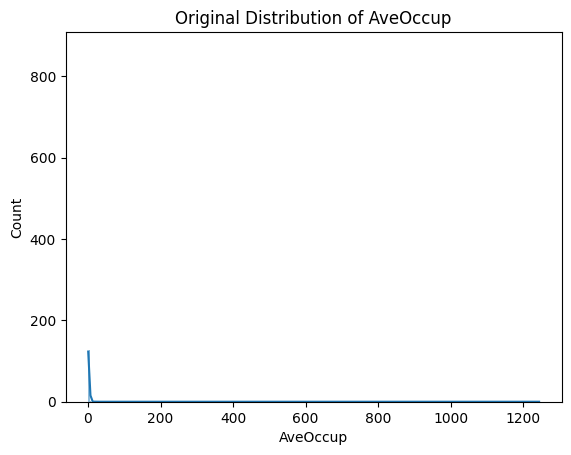

In [3]:
sns.histplot(df['AveOccup'], kde=True)
plt.title('Original Distribution of AveOccup')
plt.show()

**🔁 3. What to Do If There Are Negative Values?**

❗ Many transformations (log, Box-Cox) only work with positive values.

✅ Option 1: Shift the entire column so the minimum becomes slightly positive:

In [14]:
min_value = df['AveOccup'].min()
if min_value <= 0:
    shift = abs(min_value) + 1e-6  # add a small constant
else:
    shift = 0

df['AveOccup_shifted'] = df['AveOccup'] + shift

**🔣 4. Log Transformation**

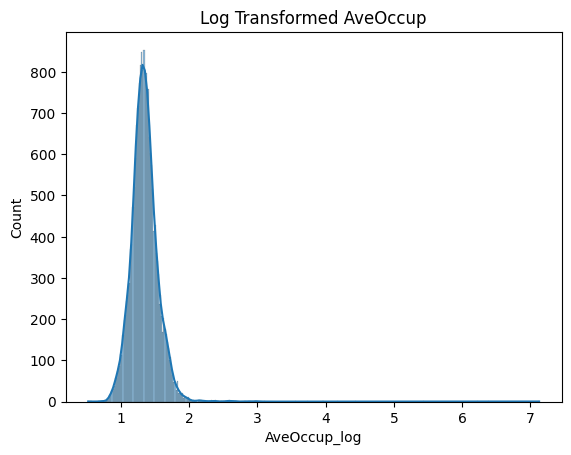

In [15]:
df['AveOccup_log'] = np.log1p(df['AveOccup_shifted'])
sns.histplot(df['AveOccup_log'], kde=True)
plt.title('Log Transformed AveOccup')
plt.show()

**√ 5. Square Root Transformation**

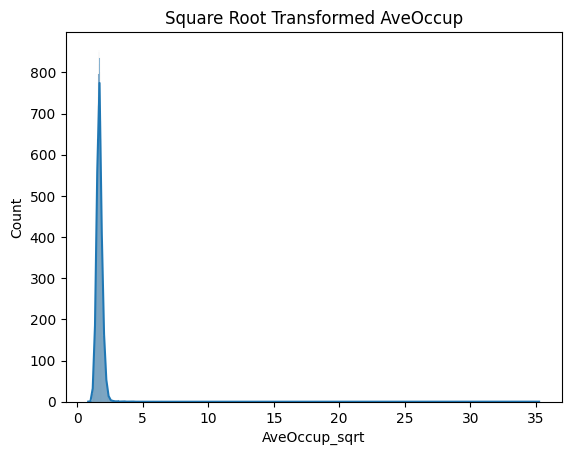

In [16]:
df['AveOccup_sqrt'] = np.sqrt(df['AveOccup_shifted'])
sns.histplot(df['AveOccup_sqrt'], kde=True)
plt.title('Square Root Transformed AveOccup')
plt.show()

**📦 6. Box-Cox Transformation (Only for Positive Values)**

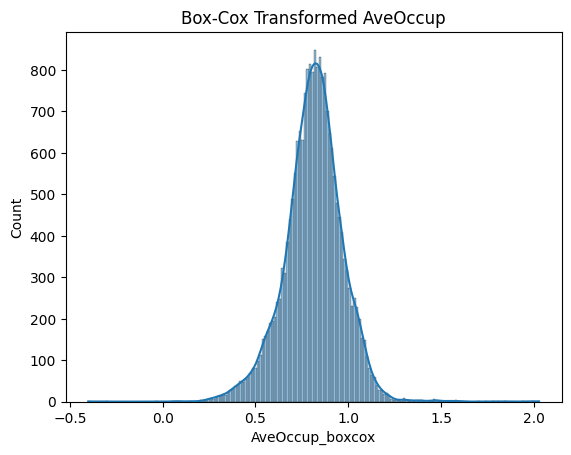

In [17]:
from scipy.stats import boxcox

df['AveOccup_boxcox'], _ = boxcox(df['AveOccup_shifted'])
sns.histplot(df['AveOccup_boxcox'], kde=True)
plt.title('Box-Cox Transformed AveOccup')
plt.show()

**🌀 7. Yeo-Johnson Transformation (Works for Negative Values Too)**

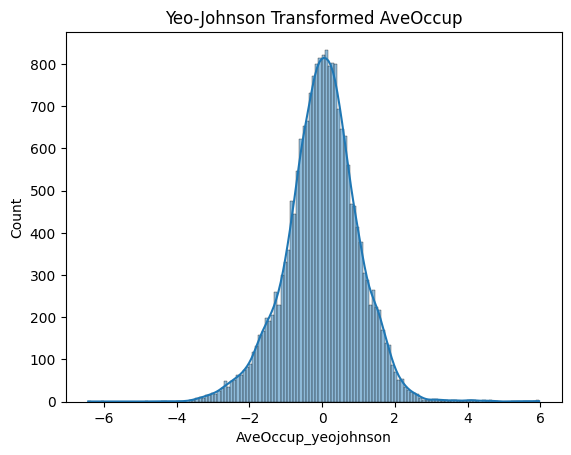

In [18]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df['AveOccup_yeojohnson'] = pt.fit_transform(df[['AveOccup']])
sns.histplot(df['AveOccup_yeojohnson'], kde=True)
plt.title('Yeo-Johnson Transformed AveOccup')
plt.show()

**📉 8. Compare Skewness**

In [19]:
print('Original:', skew(df['AveOccup']))
print('Log Transformed:', skew(df['AveOccup_log']))
print('Sqrt Transformed:', skew(df['AveOccup_sqrt']))
print('Box-Cox Transformed:', skew(df['AveOccup_boxcox']))
print('Yeo-Johnson Transformed:', skew(df['AveOccup_yeojohnson']))

Original: 97.63246492211677
Log Transformed: 3.879396923810052
Sqrt Transformed: 43.33888510821591
Box-Cox Transformed: -0.12682762056507454
Yeo-Johnson Transformed: -0.10687995428516486


**📏 9. Should You Normalize Before or After?**

🔹 Always normalize after transformation:

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['AveOccup_scaled'] = scaler.fit_transform(df[['AveOccup_yeojohnson']])
print(df['AveOccup'])
print("-----------------")
print(df['AveOccup_scaled'])

0        2.555556
1        2.109842
2        2.802260
3        2.547945
4        2.181467
           ...   
20635    2.560606
20636    3.122807
20637    2.325635
20638    2.123209
20639    2.616981
Name: AveOccup, Length: 20640, dtype: float64
-----------------
0       -0.368763
1       -1.186265
2        0.005053
3       -0.381080
4       -1.040230
           ...   
20635   -0.360617
20636    0.426994
20637   -0.764455
20638   -1.158527
20639   -0.271159
Name: AveOccup_scaled, Length: 20640, dtype: float64


**✅ Summary:**

| Transformation | Handles Negatives? | Normalize Before? | Normalize After? |
|----------------|---------------------|--------------------|-------------------|
| Log            | ❌ No               | ❌ No              | ✅ Yes            |
| Square Root    | ❌ No               | ❌ No              | ✅ Yes            |
| Box-Cox        | ❌ No               | ❌ No              | ✅ Yes            |
| Yeo-Johnson    | ✅ Yes              | ❌ No              | ✅ Yes            |



🔁 **Common Transformations for Skewed Data**

| Transformation | Formula / Method                         | Use When...                                              | Handles Negatives? |
|----------------|-------------------------------------------|----------------------------------------------------------|---------------------|
| **Log**        | `log(x + 1)` or `np.log1p(x)`             | Data is right-skewed, all values > 0                    | ❌ (only positive)  |
| **Square Root**| `np.sqrt(x)` or `np.sqrt(x + c)`          | Mild skew, reduces impact of large values               | ❌ (only positive)  |
| **Box-Cox**    | `scipy.stats.boxcox(x)`                   | Strong skew, data > 0, needs normalization              | ❌ (only positive)  |
| **Yeo-Johnson**| `PowerTransformer(method='yeo-johnson')`  | Works on any real number, good for general use          | ✅                  |


**⚠️ What if data has negative values?**

👉 You must shift the data before applying log, sqrt, or Box-Cox:

In [ ]:
min_val = df['feature'].min()
if min_val <= 0:
    df['feature'] += abs(min_val) + 1e-6

🌀 Or use Yeo-Johnson, which automatically handles negative values — no shifting needed.

**🧼 Normalization (Standardization)**

Always apply normalization after transformation, especially if:

You’re using algorithms like SVM, KNN, linear regression, or neural networks

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['feature_scaled'] = scaler.fit_transform(df[['feature_transformed']])